<a href="https://colab.research.google.com/github/divyakumar95/Blog_gender_classification/blob/main/NLP_CA01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exercise 3

Using the Bog Gender dataset provided to build a BLOG Gender Classifier. You may use any tool of your choice, for example, RapidMiner; Databricks Spark; Python; R or similar.

The CRISP-DM methodology should be applied on the data and the results presented in a written report under the six headings of the CRISP-DM Methodology.

* Business Understanding 

  `Explore the domain use case.`
* Data Understanding

  `Explore the dataset.`
* Data Preparation
    
  `Apply appropriate Feature Extraction to prepare the data for modelling.`
* Modelling
  
  `Apply appropriate Algorithm(s) to build a BLOG Gender Classifier.`
* Evaluation
  
  `Interpret the performance of the Classifier in the context of your domain problem.`
* Deployment

  `Explore how the insights could be deployed (operationalised) in an AI context.`

##Business Understanding

* As a ecommerce company we want to explore and analysis which kind of customers can we target with our fashion product and accessories.

* Blogs been one of the key places where audience visit a lot could be a potential place to get our publicity and post the fashion products on.

##Data Understanding

Mount drive to colab to use dataset

###Data Files path

https://drive.google.com/file/d/1Y8UG7oG7fYjmPMb_pjtyT4240IWG5OMw/view?usp=sharing

In [1]:
dataPath = '/content/drive/MyDrive/Assignments_2nd_Sem/NLP/CA01/BLOG-GENDER-BALANCED.csv'

###Import required libraries/modules

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import inflect
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

import string, unicodedata, re

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
data = pd.read_csv(dataPath, index_col=False, encoding='cp1252')
data.reset_index(drop=True, inplace=True)
data.head()

,BLOG,GENDER
0,Beyond Getting There: What Travel Days Show U...,F
1,I remember so much about the island; the large...,F
2,I have had asthma and allergies my entire life...,M
3,The last few days have been an emotional rolle...,M
4,If you lined up all the teachers and staff in ...,F


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   BLOG    2599 non-null   object
 1   GENDER  2600 non-null   object
dtypes: object(2)
memory usage: 40.8+ KB


In [5]:
print('number of nan: ',data['BLOG'].isnull().sum())
data = data.dropna()

number of nan:  1


In [6]:
def bar_graph(x):
  print(data[x].value_counts())
  fig, ax = plt.subplots()
  fig.suptitle(x, fontsize=12)
  data[x].reset_index().groupby(x).count().sort_values(by= 
       "index").plot(kind="barh", legend=False, 
        ax=ax).grid(axis='x')
  plt.show()

F    1300
M    1299
Name: GENDER, dtype: int64


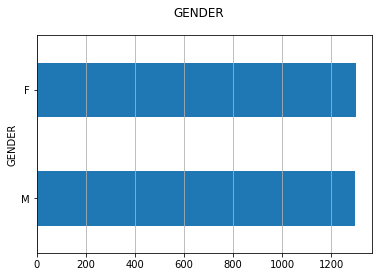

In [7]:
bar_graph('GENDER')

## Data Preparation 






In [8]:
!pip install langdetect

#### Language Detection

In [9]:
import langdetect 

data['lang'] = data["BLOG"].apply(lambda x: langdetect.detect(x) if 
                                 x.strip() != "" else "")
data[data.lang != 'en']

,BLOG,GENDER,lang
766,"Bonjour à tous et bienvenue! Moi, gourmande ?...",F,fr
885,Ada apa dengan pelayar web Opera 10.50? Hmm.....,M,id
1421,Sair para comer a dois é uma aventura que eu ...,M,pt
1621,????? ??? ??????? ????¢ ¢????? ???? ??????? ??...,M,tl


en    2595
fr       1
id       1
pt       1
tl       1
Name: lang, dtype: int64


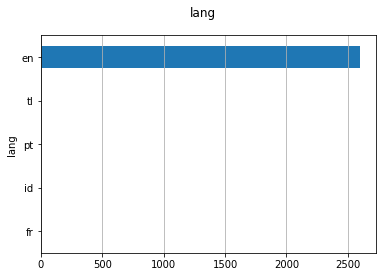

In [10]:
bar_graph('lang')

Filtering only english language

In [11]:
data.drop(data.loc[data['lang']!='en'].index, inplace=True)

### Text Preprocessing and Length analysis

### Text Preprocessing

* Punctuation Removal
* Lowering the text
* Stop word removal
* Stemming - Optional depending on use case
* Lemmatization - Optional depending on use case

In [12]:
def clean_text(x):
  try:
    x = x.encode('ascii', 'ignore').decode() #'ascii')
    x = re.sub('[%s]' % re.escape(string.punctuation), ' ', x)
    x = ' '.join([word for word in x.split(' ') if word not in stopwords.words('english')])
    x = re.sub(r'[^\w\s]', '', str(x).lower().strip())
    stemmer = LancasterStemmer()
    lemmatizer = WordNetLemmatizer()
    #x = stemmer.stem(x)
    #x = lemmatizer.lemmatize(x, pos='v')
    return x
  except Exception as e:
    print(x,e)

def tokenize(x):
  x = nltk.word_tokenize(x)
  return x

####Length analysis

In [13]:
data['CLEAN_BLOG'] = data.BLOG.apply(clean_text)
data['CLEAN_BLOG_V1'] = data.CLEAN_BLOG.apply(tokenize)
data['WORD_COUNT'] = data["BLOG"].apply(lambda x: len(str(x).split(" ")))
data['CHAR_COUNT'] = data["BLOG"].apply(lambda x: sum(len(word) for word in str(x).split(" ")))
data['SENTENCE_COUNT'] = data["BLOG"].apply(lambda x: len(str(x).split(".")))
data['AVG_WORD_LENGTH'] = data['CHAR_COUNT'] / data['WORD_COUNT']
data['AVG_SENTENCE_LENGTH'] = data['WORD_COUNT'] / data['SENTENCE_COUNT']
data.head()

,BLOG,GENDER,lang,CLEAN_BLOG,CLEAN_BLOG_V1,WORD_COUNT,CHAR_COUNT,SENTENCE_COUNT,AVG_WORD_LENGTH,AVG_SENTENCE_LENGTH
0,Beyond Getting There: What Travel Days Show U...,F,en,beyond getting there what travel days show us...,"[beyond, getting, there, what, travel, days, s...",689,3272,27,4.748911,25.518519
1,I remember so much about the island; the large...,F,en,i remember much island large lighthouse helpe...,"[i, remember, much, island, large, lighthouse,...",241,1078,9,4.473029,26.777778
2,I have had asthma and allergies my entire life...,M,en,i asthma allergies entire life while i bet ma...,"[i, asthma, allergies, entire, life, while, i,...",238,1048,20,4.403361,11.900000
3,The last few days have been an emotional rolle...,M,en,the last days emotional rollercoaster team beh...,"[the, last, days, emotional, rollercoaster, te...",102,495,6,4.852941,17.000000
4,If you lined up all the teachers and staff in ...,F,en,if lined teachers staff school search might po...,"[if, lined, teachers, staff, school, search, m...",211,900,22,4.265403,9.590909


y dimention:  (2595,)
0    1299
1    1296
Name: GENDER, dtype: int64
F    1299
M    1296
Name: GENDER, dtype: int64


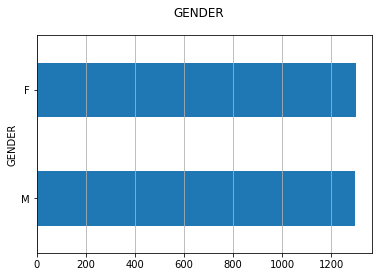

In [14]:
y = data.GENDER.replace({'M': 1, 'F': 0})
print('y dimention: ', y.shape)
print(y.value_counts())
bar_graph('GENDER')

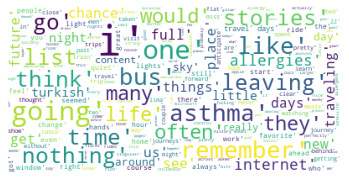

In [15]:
from wordcloud import WordCloud, STOPWORDS

text = data['CLEAN_BLOG_V1'].values 

wordcloud = WordCloud( background_color ='white', 
            #stopwords = stopwords, 
            max_font_size = 50).generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [16]:
X_extra = data.drop(['BLOG','CLEAN_BLOG', 'GENDER','lang','CLEAN_BLOG_V1'], axis=1)
X_extra.head()

,WORD_COUNT,CHAR_COUNT,SENTENCE_COUNT,AVG_WORD_LENGTH,AVG_SENTENCE_LENGTH
0,689,3272,27,4.748911,25.518519
1,241,1078,9,4.473029,26.777778
2,238,1048,20,4.403361,11.900000
3,102,495,6,4.852941,17.000000
4,211,900,22,4.265403,9.590909


#### Count Vectorizer


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [18]:
cv = CountVectorizer()
X_CV = cv.fit_transform(data['CLEAN_BLOG'])
X_CV = X_CV.todense()
print('X dimention: ', X_CV.shape)
list(cv.vocabulary_.items())[:2]

X dimention:  (2595, 47630)


[('beyond', 5109), ('getting', 17830)]

In [19]:
X_CV

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

#### TF-IDF

In [20]:
TF_IDF_Vect = TfidfVectorizer(stop_words='english',use_idf=True)
X_TF =  TF_IDF_Vect.fit_transform(data['CLEAN_BLOG'])
X_TF = X_TF.todense()
first_vector_tfidfvectorizer=X_TF[0] 
# place tf-idf values in a pandas data frame 
#df = pd.DataFrame(first_vector_tfidfvectorizer.T.todense(), index=tfidf_vectorizer.get_feature_names(), columns=["tfidf"]) df.sort_values(by=["tfidf"],ascending=False)
df = pd.DataFrame(first_vector_tfidfvectorizer.T, index=TF_IDF_Vect.get_feature_names(), columns=["tfidf"])
df.sort_values(by=["tfidf"],ascending=False)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,tfidf
bus,0.292692
turkish,0.251722
travel,0.220074
traveling,0.182252
leaving,0.148443
...,...
fertility,0.000000
fertilizer,0.000000
fervent,0.000000
fervently,0.000000


In [21]:
print(X_TF.shape)

(2595, 47324)


#### Tokenizer

In [39]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(data['CLEAN_BLOG'])

X_TOK = tokenizer.texts_to_sequences(data['CLEAN_BLOG'])

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

print(data['CLEAN_BLOG_V1'][2])
print(X_TOK[2])
print('Vocab size',vocab_size)

['i', 'asthma', 'allergies', 'entire', 'life', 'while', 'i', 'bet', 'many', 'asthmatics', 'might', 'disagree', 'i', 'think', 'allergies', 'far', 'worse', 'asthma', 'yes', 'i', 'say', 'i', 'think', 'allergies', 'suck', 'asthma', 'actually', 'easier', 'control', 'allergies', 'even', 'i', 'advair', 'finally', 'asthma', 'control', 'allergies', 'continued', 'irritate', 'crap', 'sure', 'allergy', 'shots', 'things', 'nothing', 'sting', 'arm', 'week', 'three', 'years', 'sure', 'antihystamines', 'decongestants', 'nasal', 'sprays', 'i', 'around', 'one', 'allergens', 'took', 'edge', 'annoying', 'feeling', 'get', 'sinuses', 'nose', 'you', 'sneeze', 'you', 'get', 'runny', 'nose', 'you', 'feel', 'right', 'miserable', 'i', 'rather', 'asthma', 'attack', 'a', 'worse', 'case', 'scenerio', 'asthma', 'go', 'er', 'yet', 'even', 'er', 'nothing', 'allergy', 'symptoms', 'this', 'change', 'however', 'invention', 'singulair', 'man', 'drug', 'awesome', 'anyway', 'advair', 'really', 'helps', 'now', 'i', 'actually

In [40]:
maxlen = 200

X_TOK = pad_sequences(X_TOK, padding='post', maxlen=maxlen)

print(X_TOK[1, :])
print('length of Tokneizer: ',len(X_TOK[1,:]))

[   1  197   17 1193  485 1162  763 2359   46 1997    1  306 4104 2504
  101   59    1 1854  664  297  306    8  365  362  188   26  306  418
 1194   55 3154   76  309  246 4980  117 2505   94  697  711    1  196
    1  197 1374  246  204  346 3960 2619   18 3472 1703 3836  304  171
  451    1  197  947  107   24 1106  433  246  947    3  949 1149 2404
  362 1374    1  246  126  857  288  104  243  830  211  101 1374  246
  628 2095  697 1327   13   41   68  101 1267  474 1267 1223 1267 1374
  204   32 1774 1457  543   46 1458   46 2122  858    1  197 1106 2505
  204   46    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

In [41]:
X_TOK.shape

(2595, 200)

#### Dimentionality Reduction

* SVD - Singular Value Decomposition
* PCA - Principal component analysis

In [25]:
from keras.wrappers.scikit_learn import KerasClassifier

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


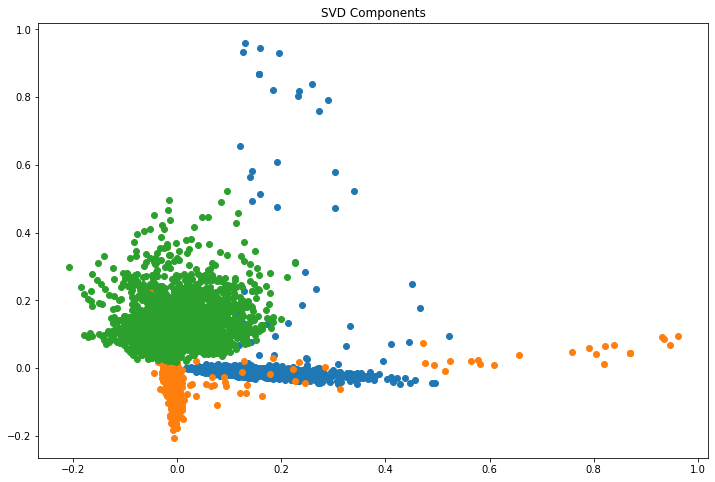

In [26]:
from sklearn.decomposition import TruncatedSVD 
svd = TruncatedSVD(n_components=3, random_state=42).fit_transform(X_TF)#df[feat_cols].values)

plt.figure(figsize=(12,8))
plt.title('SVD Components')
plt.scatter(svd[:,0], svd[:,1])
plt.scatter(svd[:,1], svd[:,2])
plt.scatter(svd[:,2],svd[:,0])
X_SVD = pd.DataFrame(svd)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


Text(0.5, 1.0, 'Component-wise and Cumulative Explained Variance')

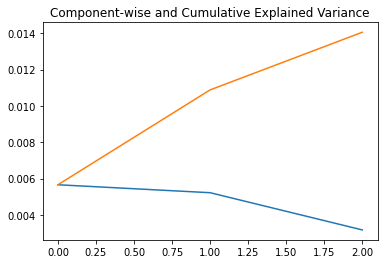

In [59]:
from sklearn.decomposition import PCA

# initialize PCA with 2 components
pca = PCA(n_components=3)#, random_state=42)
# pass our X to the pca and store the reduced vectors into pca_vecs
pca_vecs = pca.fit_transform(X_TF)#.toarray())
# save our two dimensions into x0 and x1
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]
x2 = pca_vecs[:, 2]
X_PCA = pd.DataFrame(pca_vecs)

plt.plot(range(3), pca.explained_variance_ratio_)
plt.plot(range(3), np.cumsum(pca.explained_variance_ratio_))
plt.title("Component-wise and Cumulative Explained Variance")

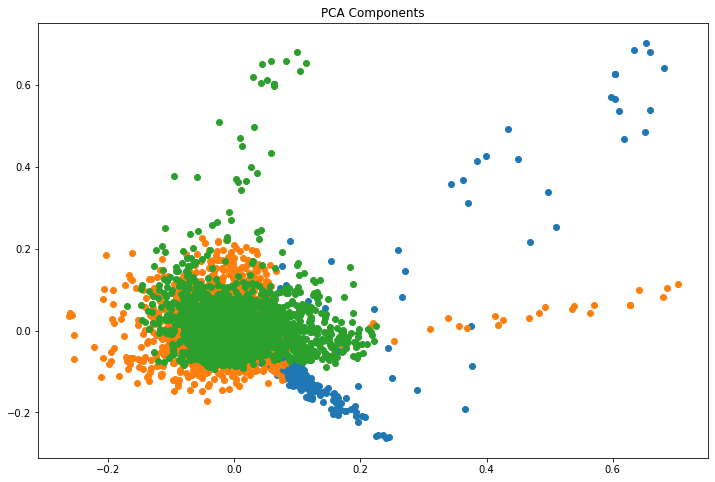

In [60]:
plt.figure(figsize=(12,8))
plt.title('PCA Components')
plt.scatter(pca_vecs[:,0], pca_vecs[:,1])
plt.scatter(pca_vecs[:,1], pca_vecs[:,2])
plt.scatter(pca_vecs[:,2], pca_vecs[:,0])

<Figure size 432x288 with 0 Axes>

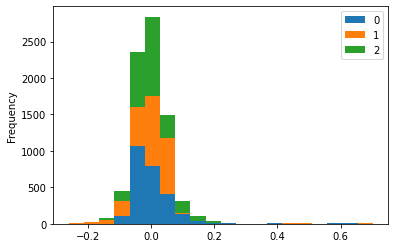

In [61]:
plt.figure()
X_PCA.plot.hist(stacked=True, bins=20)

In [66]:
import matplotlib.pyplot as plt

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

Deep Learning Model training and Evaluation

In [67]:
from keras.models import Sequential
from keras.layers import Dense
from keras import layers
from sklearn.model_selection import train_test_split, cross_val_score



i = 2
X_train,X_test,y_train,y_test=train_test_split(X_PCA,y,test_size=0.2, random_state=i)# split dataset
input_dim = X_train.shape[1]  # Number of features

model = Sequential()
model.add(layers.Dense(20, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()
history = model.fit(X_train, y_train,
                    epochs=50,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=20)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 20)                80        
                                                                 
 dense_13 (Dense)            (None, 10)                210       
                                                                 
 dense_14 (Dense)            (None, 1)                 11        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
104/104 [==============================] - 2s 6ms/step - loss: 0.6911 - accuracy: 0.5617 - val_loss: 0.6881 - val_accuracy: 0.5665
Epoch 2/50
104/104 [==============================] - 0s 3ms/step - loss: 0.6850 - accuracy: 0.5780 - val_loss: 0.6801 - val_accuracy: 0.5665
Epoch 3/50
104/104 [================

Training Accuracy: 0.6108
Testing Accuracy:  0.6031


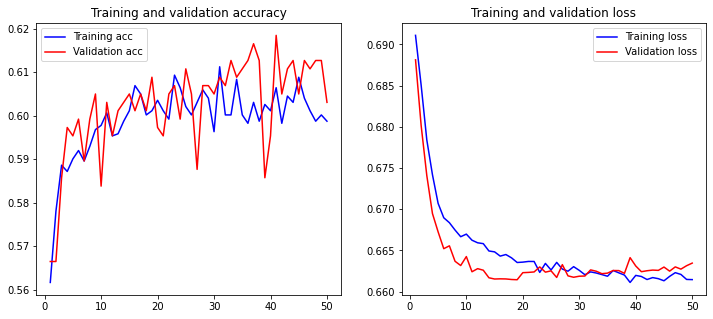

In [68]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

Import required models

In [69]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier # decision tee algorithm for classification
from sklearn.naive_bayes import CategoricalNB, GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR,SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, plot_roc_curve
import pickle
import timeit, time

In [90]:
def get_stacking():
	# define the base models: level0 models
	level0 = list()
	level0.append(('lr', LogisticRegression(solver='lbfgs', max_iter=500)))
	level0.append(('nb', GaussianNB())) # RandomForestClassifier(n_estimators=130, criterion='entropy')))
	level0.append(('svm', SVC(kernel='rbf')))
	# define meta learner model: level 1
	level1 = LogisticRegression(solver='lbfgs', max_iter=500)
	# define the stacking ensemble
	model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
	return model

In [87]:
def base_models():
  NB = GaussianNB()
  svm = SVC(kernel='rbf')
  models = dict()
  models['NB'] = GaussianNB()
  models['lr'] = LogisticRegression(solver='lbfgs', max_iter=500)
  models['svm_Linear'] = SVC(kernel='linear')
  models['svm_Polly'] = SVC(kernel='poly')
  models['svm_RBF'] = SVC(kernel='rbf')
  models['svm_Sigmoid'] = SVC(kernel='sigmoid')
  models['dt_ent'] = DecisionTreeClassifier(criterion='entropy')
  models['dt_gini'] = DecisionTreeClassifier(criterion='gini')
  models['rf'] = RandomForestClassifier(n_estimators=130, criterion='entropy')
  models['bagging_NB'] = BaggingClassifier(base_estimator=NB, n_estimators=50, max_samples=0.8, max_features=0.8)
  models['bagging_SVM'] = BaggingClassifier(base_estimator=svm, n_estimators=50, max_samples=0.8, max_features=0.8)
  models['adaboost_nb'] = AdaBoostClassifier(base_estimator=NB, n_estimators=800)
  models['stacking'] = get_stacking()
  return models

In [88]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

def evaluate_model_Multi(model, X, y, mc):
  acc = [] ### Blank vector
  f = []
  prec = []
  rec = []
  single = timeit.default_timer()
  for i in range(mc):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=i)# split dataset
    #dt = make_pipeline(StandardScaler(),model) #pipeline to reduce computation time
    dt = model.fit(X_train,y_train) # fit the model
    YPred = dt.predict(X_test) # predict
    a = accuracy_score(y_test,YPred) # compute accuracy
    acc.append(a) # append accuracy
    f1 = f1_score(y_test, YPred, average='weighted')
    precision = precision_score(y_test, YPred, average='weighted')
    recall = recall_score(y_test, YPred, average='weighted')
    f.append(f1)
    prec.append(precision)
    rec.append(recall)
    timed = timeit.default_timer() - single
    return np.mean(acc), dt, np.mean(recall), np.mean(prec),np.mean(f), np.mean(timed)

Function to save Models

In [117]:
import os

def dump_model(x,mod,name):
  dire = 'Models/'+x
  if not os.path.exists(dire):
    os.makedirs(dire)
  filename = dire+'/'+name+'.pkl'
  pickle.dump(mod,open(filename,'wb'))

Model Evaluation with PCA dimensionality reduction techniques

In [194]:
from numpy import mean, std
import warnings
warnings.filterwarnings("ignore")
# get the models to evaluate
models = base_models()
# evaluate the models and store results
Single_results, Single_names = list(), list()
Single_run = 50
start_single = timeit.default_timer()
for name, model in models.items():
	scores, mod, prec, recall,fscore, timed = evaluate_model_Multi(model,X_PCA,y,Single_run) #,X_over,y_over)#, X, y)
	Single_results.append(scores)
	Single_names.append(name)
	#filename = 'Models/'+name+'.pkl'
	#pickle.dump(mod, open(filename, 'wb'))
	dump_model('X_PCA',mod,name)
	print(name,'-- accuracy:', mean(scores), '-- Deviation',std(scores),'-- Precision ', mean(prec),'-- Recall', mean(recall),'-- Fscore:', mean(fscore))
print('Total time for single run to check models: ', timeit.default_timer() - start_single) 

NB -- accuracy: 0.5838150289017341 -- Deviation 0.0 -- Precision  0.5838150289017341 -- Recall 0.590612806207444 -- Fscore: 0.5617212588310854
lr -- accuracy: 0.6184971098265896 -- Deviation 0.0 -- Precision  0.6184971098265896 -- Recall 0.6182185346089684 -- Fscore: 0.6153432913247796
svm_Linear -- accuracy: 0.5973025048169557 -- Deviation 0.0 -- Precision  0.5973025048169557 -- Recall 0.5995074461734248 -- Fscore: 0.5867515193005413
svm_Polly -- accuracy: 0.5491329479768786 -- Deviation 0.0 -- Precision  0.5491329479768786 -- Recall 0.5682009920727326 -- Fscore: 0.47595054739072784
svm_RBF -- accuracy: 0.6358381502890174 -- Deviation 0.0 -- Precision  0.6358381502890174 -- Recall 0.6352950455779783 -- Fscore: 0.6351666887775895
svm_Sigmoid -- accuracy: 0.5260115606936416 -- Deviation 0.0 -- Precision  0.5260115606936416 -- Recall 0.5281370092614479 -- Fscore: 0.5261277032765599
dt_ent -- accuracy: 0.5375722543352601 -- Deviation 0.0 -- Precision  0.5375722543352601 -- Recall 0.538294

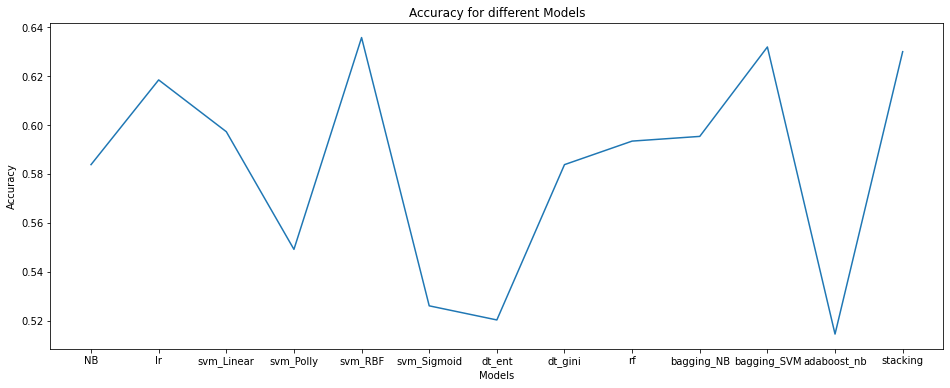

In [119]:
plt.figure(figsize=(16, 6))
plt.plot(Single_names, Single_results)
plt.ylabel('Accuracy'); plt.xlabel('Models'); plt.title('Accuracy for different Models');
plt.show()

Model Evaluation with SVD dimensionality reduction techniques

In [120]:
from numpy import mean, std
import warnings
import os
warnings.filterwarnings("ignore")

# get the models to evaluate
models = base_models()
# evaluate the models and store results
Single_results, Single_names = list(), list()
Single_run = 20
start_single = timeit.default_timer()
for name, model in models.items():
	scores, mod, prec, recall,fscore, timed = evaluate_model_Multi(model,X_SVD,y,Single_run) #,X_over,y_over)#, X, y)
	Single_results.append(scores)
	Single_names.append(name)
	dump_model('X_SVD',mod,name)
	print(name,'-- accuracy:', mean(scores), '-- Deviation',std(scores),'-- Precision ', mean(prec),'-- Recall', mean(recall),'-- Fscore:', mean(fscore))
print('Total time for single run to check models: ', timeit.default_timer() - start_single) 

NB -- accuracy: 0.6069364161849711 -- Deviation 0.0 -- Precision  0.6069364161849711 -- Recall 0.6089459252540841 -- Fscore: 0.5983727297811674
lr -- accuracy: 0.6339113680154143 -- Deviation 0.0 -- Precision  0.6339113680154143 -- Recall 0.6335590923887702 -- Fscore: 0.6318732083697725
svm_Linear -- accuracy: 0.6165703275529865 -- Deviation 0.0 -- Precision  0.6165703275529865 -- Recall 0.6198833699933501 -- Fscore: 0.6075113483352746
svm_Polly -- accuracy: 0.5934489402697495 -- Deviation 0.0 -- Precision  0.5934489402697495 -- Recall 0.6169591529866839 -- Fscore: 0.5563351464188333
svm_RBF -- accuracy: 0.653179190751445 -- Deviation 0.0 -- Precision  0.653179190751445 -- Recall 0.652957174686997 -- Fscore: 0.6530293649884745
svm_Sigmoid -- accuracy: 0.48940269749518306 -- Deviation 0.0 -- Precision  0.48940269749518306 -- Recall 0.4894975056873448 -- Fscore: 0.48944828908422294
dt_ent -- accuracy: 0.5992292870905588 -- Deviation 0.0 -- Precision  0.5992292870905588 -- Recall 0.600797

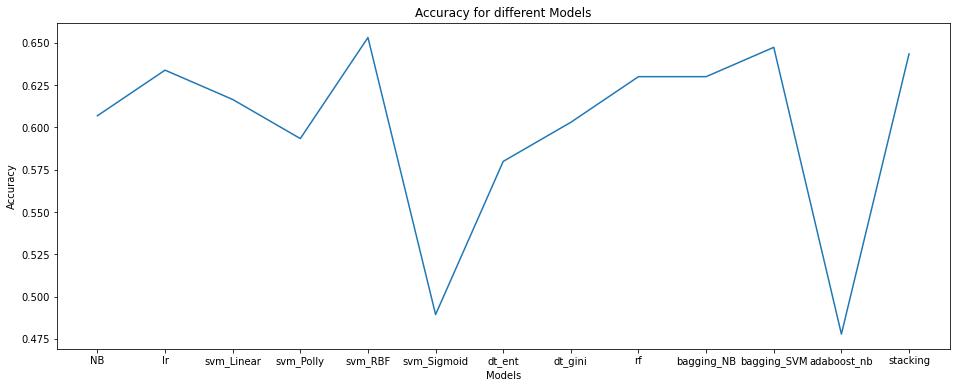

In [109]:
plt.figure(figsize=(16, 6))
plt.plot(Single_names, Single_results)
plt.ylabel('Accuracy'); plt.xlabel('Models'); plt.title('Accuracy for different Models');
plt.show()

Cross Validation Machine Learning Model

In [121]:
def evaluate_model_cross(model, X, y):
	cv = 4
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv)
	return scores

In [122]:
from numpy import mean, std
# get the models to evaluate
models = base_models()
# evaluate the models and store results
cross_results, cross_names = list(), list()
for name, model in models.items():
	scores = evaluate_model_cross(model, X_PCA, y)
	cross_results.append(scores)
	cross_names.append(name)
	#filename = 'Models/'+name+'.pkl'
	#pickle.dump(mod, open(filename, 'wb'))
	dump_model('X_PCA_cross',mod,name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>NB 0.573 (0.023)
>lr 0.586 (0.030)
>svm_Linear 0.578 (0.027)
>svm_Polly 0.517 (0.011)
>svm_RBF 0.590 (0.041)
>svm_Sigmoid 0.520 (0.015)
>dt_ent 0.518 (0.004)
>dt_gini 0.529 (0.006)
>rf 0.572 (0.017)
>bagging_NB 0.573 (0.023)
>bagging_SVM 0.596 (0.037)
>adaboost_nb 0.517 (0.019)
>stacking 0.588 (0.036)


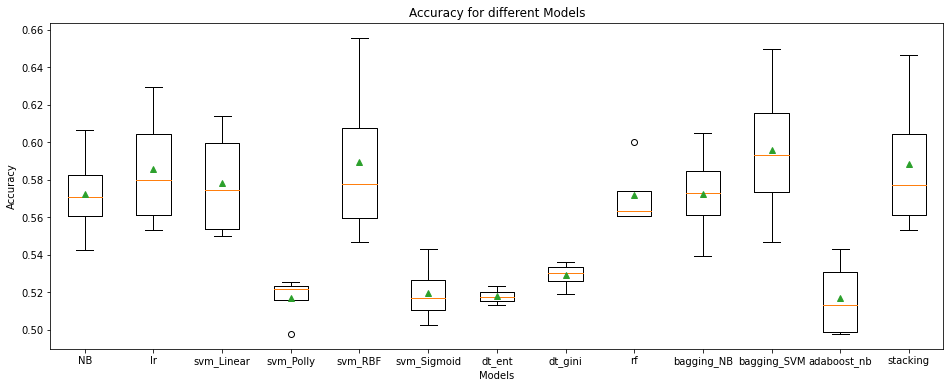

In [193]:
plt.figure(figsize=(16, 6))
plt.boxplot(cross_results, labels=cross_names, showmeans=True)
plt.ylabel('Accuracy'); plt.xlabel('Models'); plt.title('Accuracy for different Models');
plt.show()

## Deployment

In Deployment phase we can select the best suitable model from the results obtained and use it for further analysis

In [189]:
Doc1= "A fascinating site run by a writing team to help romance writers “establish and advance their careers, introducing readers to a variety of authors, and delving into the ever-inscrutable male mind.” Worth a look for any writer, not just those in genre fiction."
Doc2= "Nowadays, future literary historians, biographers and researchers will no longer have at their disposal such a fertile domain or archives when it comes to studying the authors of today. Emails leave no trace beyond their ephemeral electronic incarnation and modern writers are more likely to be laying down their thoughts, fantasies and obsessions in blogs rather than personal journals. Is a literary tradition being lost altogether, or is it just evolving?"
Doc3= "I only read women. I know that men write books. But their lives are so limited. It’s such a small and narrow experience….Their literature just really can’t match anything written by a woman. I just think ‘**** off’."
Doc = [Doc1, Doc2, Doc3]

In [190]:
Doc_cleaned = []
for i in Doc:
  Doc_cleaned.append(clean_text(i))

In [191]:
TF_IDF_Vect = TfidfVectorizer(stop_words='english',use_idf=True)
TEST_X_TF =  TF_IDF_Vect.fit_transform(Doc_cleaned)

# initialize PCA with 2 components
pca = PCA(n_components=3)#, random_state=42)
# pass our X to the pca and store the reduced vectors into pca_vecs
pca_vecs = pca.fit_transform(TEST_X_TF.toarray())
# save our two dimensions into x0 and x1
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]
x2 = pca_vecs[:, 2]
TEST_X_PCA = pd.DataFrame(pca_vecs)


model_name = '/content/Models/X_PCA/svm_RBF.pkl'


loaded_model = pickle.load(open(model_name, 'rb'))
y_pred = loaded_model.predict(TEST_X_PCA)

In [192]:
for i in y_pred:
  if i != 1:
    print('Female')
  else:
    print('Male')

Female
Female
Female


References

* https://medium.com/analytics-vidhya/building-a-text-classification-model-using-bilstm-c0548ace26f2

* https://towardsdatascience.com/how-to-clean-text-data-639375414a2f

* https://towardsdatascience.com/cleaning-text-data-with-python-b69b47b97b76

* https://towardsdatascience.com/deep-learning-techniques-for-text-classification-78d9dc40bf7c